In [26]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV, cross_validate, PredefinedSplit
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, make_scorer
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [27]:
data_train = pd.read_csv("train.csv")
data_test = pd.read_csv("test.csv")
# Filtrar data_train
data_train = data_train[data_train['max_price'] < 100]

# Filtrar data_test
data_test = data_test[data_test['max_price'] < 100]

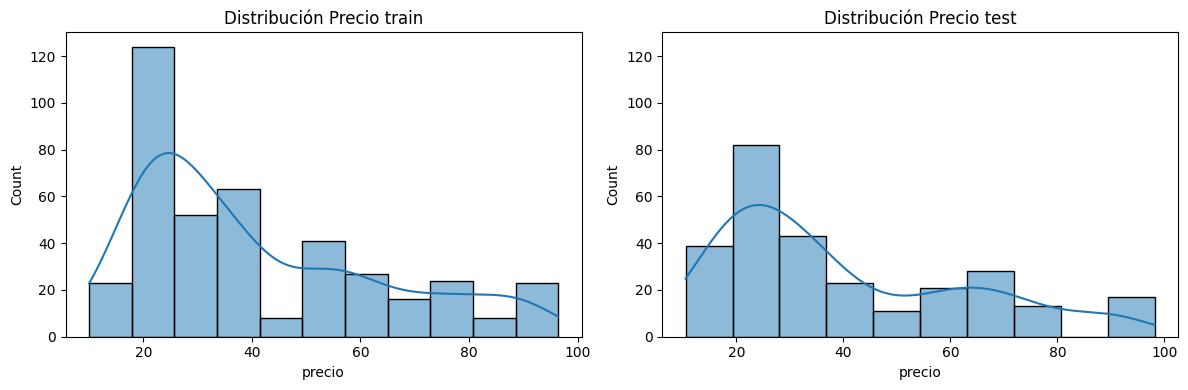

In [28]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.histplot(data=data_train, x='max_price', kde=True, ax=ax1)
ax1.set_title("Distribución Precio train")
ax1.set_xlabel('precio')

sns.histplot(data=data_test, x='max_price', kde=True, ax=ax2)
ax2.set_title("Distribución Precio test")
ax2.set_xlabel('precio')

# Encontrar el valor máximo de y en ambos gráficos
y_max = max(ax1.get_ylim()[1], ax2.get_ylim()[1])

# Establecer el mismo límite para ambos ejes y
ax1.set_ylim(0, y_max)
ax2.set_ylim(0, y_max)

plt.tight_layout()
plt.show()

In [29]:
# Eliminamos las categoricas
columnas=['name','EventStartTime', 'SalesStartTIme', 'SalesEndTime', 'nameArtist', 'VenueName',
          'VenueCity', 'VenueState','Generos_combinados', 'min_price']

train = data_train.drop(columnas, axis=1)
train = train.drop('fold', axis=1)
test = data_test.drop(columnas, axis=1)

RANDOM_STATE = 83 #fijamos la semilla


In [30]:
# Definir la variable objetivo y las características
y_train = train['max_price']
X_train = train.drop('max_price', axis=1)

# Definir la variable objetivo y las características
y_test = test['max_price']
X_test = test.drop('max_price', axis=1)

In [31]:
X_test['New Wave']=0
X_test['Performance Art']=0

In [32]:
X_test = X_test[X_train.columns]
X_test

,num_links,seguidoresSpotify,popularidad,subsYT,VenueClass,NumGeneros,peso_promotor,tiene_lastfm_url,conciertos_del_artista_en_ciudad,tiene_twitter,...,Rock,Singer-Songwriter,Soul,Urban,World,tiene_wiki,tiene_youtube,dias_Venta,dias_desdeFinVenta,num_noches
1,7,2.817062e+06,75.000000,2.890000e+06,2,2,7,0,1.0,1,...,1,0,0,0,0,0,1,364,0,1
9,5,2.995447e+06,72.000000,2.410000e+06,1,3,1,0,1.0,1,...,1,0,0,0,0,0,1,229,0,1
11,0,2.572597e+06,56.162602,2.591877e+06,1,1,1,0,1.0,0,...,1,0,0,0,0,0,0,250,0,1
13,3,2.572597e+06,56.162602,2.591877e+06,1,1,17,0,1.0,0,...,1,0,0,0,1,1,0,99,0,1
14,0,2.572597e+06,56.162602,2.591877e+06,2,1,2,0,1.0,0,...,1,0,0,0,0,0,0,252,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,6,1.850920e+05,52.000000,4.380000e+05,2,4,4,0,1.0,1,...,0,0,0,0,0,0,1,215,-1,1
330,0,2.572597e+06,56.162602,2.591877e+06,2,1,2,0,1.0,0,...,0,0,0,0,0,0,0,216,-1,1
331,0,2.572597e+06,56.162602,2.591877e+06,2,1,4,0,1.0,0,...,0,0,0,0,0,0,0,187,0,1
332,0,2.572597e+06,56.162602,2.591877e+06,2,1,1,0,1.0,0,...,0,0,0,0,0,0,0,211,0,1


In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Definir el modelo RandomForestRegressor con los hiperparámetros dados
modelo_rf = RandomForestRegressor(n_estimators=50,
                                  min_samples_split=5,
                                  min_samples_leaf=2,
                                  max_depth=35,
                                  random_state=RANDOM_STATE)

# Entrenar el modelo
modelo_rf.fit(X_train, y_train)
# Predecir en el conjunto de entrenamiento
y_pred_train = modelo_rf.predict(X_train)

# Calcular métricas sobre el conjunto de entrenamiento
mape_train = mean_absolute_percentage_error(y_train, y_pred_train)
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
mae_train = mean_absolute_error(y_train, y_pred_train)

print("Métricas sobre el conjunto de entrenamiento:")
print("MAPE Train:", mape_train)
print("RMSE Train:", rmse_train)
print("MAE Train:", mae_train)

# Predecir en el conjunto de prueba
y_pred_test = modelo_rf.predict(X_test)

# Calcular métricas sobre el conjunto de prueba
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
mae_test = mean_absolute_error(y_test, y_pred_test)

print("\nMétricas sobre el conjunto de prueba:")
print("MAPE Test:", mape_test)
print("RMSE Test:", rmse_test)
print("MAE Test:", mae_test)


Métricas sobre el conjunto de entrenamiento:
MAPE Train: 0.1249121460276038
RMSE Train: 7.243318670060958
MAE Train: 4.74567718073152

Métricas sobre el conjunto de prueba:
MAPE Test: 0.5673241683719061
RMSE Test: 20.75530819647833
MAE Test: 17.16078999554597


In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

# Definir el modelo RandomForestRegressor sin hiperparámetros adicionales
modelo_rf_base = RandomForestRegressor(random_state=RANDOM_STATE)

# Entrenar el modelo
modelo_rf_base.fit(X_train, y_train)

# Predecir en el conjunto de entrenamiento
y_pred_train = modelo_rf_base.predict(X_train)

# Calcular métricas sobre el conjunto de entrenamiento
mape_train = mean_absolute_percentage_error(y_train, y_pred_train)
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
mae_train = mean_absolute_error(y_train, y_pred_train)

print("Métricas sobre el conjunto de entrenamiento:")
print("MAPE Train:", mape_train)
print("RMSE Train:", rmse_train)
print("MAE Train:", mae_train)

# Predecir en el conjunto de prueba
y_pred_test = modelo_rf_base.predict(X_test)

# Calcular métricas sobre el conjunto de prueba
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
mae_test = mean_absolute_error(y_test, y_pred_test)

print("\nMétricas sobre el conjunto de prueba:")
print("MAPE Test:", mape_test)
print("RMSE Test:", rmse_test)
print("MAE Test:", mae_test)


Métricas sobre el conjunto de entrenamiento:
MAPE Train: 0.08200817827184974
RMSE Train: 4.7390200967005605
MAE Train: 3.1125365118174417

Métricas sobre el conjunto de prueba:
MAPE Test: 0.6345150672901267
RMSE Test: 21.650725450745806
MAE Test: 18.317953739040743


In [35]:
modelo_rf_base.fit(X_train, y_train)
# Realizar predicciones en el conjunto de prueba
predicciones = modelo_rf_base.predict(X_test)

# Crear DataFrame con los precios reales, predichos y el nombre del concierto
df_predicciones = pd.DataFrame({
    'Nombre del Concierto': data_test['name'],
    'Precio Real': y_test,
    'Precio Predicho': predicciones
})
# Crear scatter plot interactivo con Plotly
fig = px.scatter(df_predicciones, x='Precio Real', y='Precio Predicho', color='Nombre del Concierto',
                 title='Comparación de Precios Reales vs Precios Predichos (Random Forest)',
                 labels={'Precio Real': 'Precio Real', 'Precio Predicho': 'Precio Predicho'})

# Agregar una línea diagonal que representa la igualdad entre los precios reales y predichos
fig.add_shape(type='line',
              x0=df_predicciones['Precio Real'].min(), y0=df_predicciones['Precio Real'].min(),
              x1=df_predicciones['Precio Real'].max(), y1=df_predicciones['Precio Real'].max(),
              line=dict(color='red', width=2, dash='dash'))

# Mostrar el gráfico interactivo
fig.show()


In [42]:
def rmse_with_respect_to_median(predictions, actuals):
    predictions = np.array(predictions)
    actuals = np.array(actuals)
    median_actuals = np.median(actuals)
    squared_errors = (predictions - median_actuals) ** 2
    mse = np.mean(squared_errors)
    rmse = np.sqrt(mse)
    return rmse

def mape_with_respect_to_median(predictions, actuals):
    predictions = np.array(predictions)
    actuals = np.array(actuals)
    median_actuals = np.median(actuals)
    percentage_errors = np.abs(predictions - median_actuals) / median_actuals
    mape = np.mean(percentage_errors) * 100
    return mape

In [43]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import plotly.express as px
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import median_absolute_error

# Definir el modelo base sin hiperparámetros
modelo_rf_base = RandomForestRegressor(random_state=RANDOM_STATE)

# Entrenar el modelo con los datos de entrenamiento
modelo_rf_base.fit(X_train, y_train)

# Realizar predicciones en el conjunto de entrenamiento
y_train_pred = modelo_rf_base.predict(X_train)

# Calcular las métricas para el conjunto de entrenamiento
metrics_train = {
    'MedAE': median_absolute_error(y_train, y_train_pred),
    'MedAPE': mape_with_respect_to_median(y_train_pred, y_train),
    'MedRMSE': rmse_with_respect_to_median(y_train_pred, y_train),
    'MAPE': mean_absolute_percentage_error(y_train, y_train_pred),
    'RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred))
}

# Realizar predicciones en el conjunto de prueba
y_test_pred = modelo_rf_base.predict(X_test)

# Calcular las métricas para el conjunto de prueba
metrics_test = {
    'MedAE': median_absolute_error(y_test, y_test_pred),
    'MedAPE': mape_with_respect_to_median(y_test_pred, y_test),
    'MedRMSE': rmse_with_respect_to_median(y_test_pred, y_test),
    'MAPE': mean_absolute_percentage_error(y_test, y_test_pred),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred))
}

# Imprimir los resultados de las métricas para el conjunto de entrenamiento
print("Métricas para el conjunto de entrenamiento:")
for metric_name, metric_value in metrics_train.items():
    print(f"{metric_name}: {metric_value:.4f}")

# Imprimir los resultados de las métricas para el conjunto de prueba
print("\nMétricas para el conjunto de prueba:")
for metric_name, metric_value in metrics_test.items():
    print(f"{metric_name}: {metric_value:.4f}")


# Crear DataFrame con los precios reales, predichos, desviación y el nombre del concierto
df_predicciones = pd.DataFrame({
    'Nombre del Concierto': data_test['name'],
    'Precio Real': y_test,
    'Precio Predicho': predicciones,
    'Desviación Absoluta': np.abs(y_test - predicciones)
})

# Crear scatter plot interactivo con Plotly
fig = px.scatter(df_predicciones, x='Precio Real', y='Precio Predicho', color='Desviación Absoluta',
                 title='Comparación de Precios Reales vs Precios Predichos (Random Forest)',
                 labels={'Precio Real': 'Precio Real', 'Precio Predicho': 'Precio Predicho'},
                 hover_data=['Nombre del Concierto', 'Desviación Absoluta'])

# Agregar una línea diagonal que representa la igualdad entre los precios reales y predichos
fig.add_shape(type='line',
              x0=df_predicciones['Precio Real'].min(), y0=df_predicciones['Precio Real'].min(),
              x1=df_predicciones['Precio Real'].max(), y1=df_predicciones['Precio Real'].max(),
              line=dict(color='red', width=2, dash='dash'))

# Mostrar el gráfico interactivo
fig.show()


Métricas para el conjunto de entrenamiento:
MedAE: 1.6927
MedAPE: 45.6749
MedRMSE: 20.8024
MAPE: 0.0820
RMSE: 4.7390

Métricas para el conjunto de prueba:
MedAE: 17.4042
MedAPE: 42.9356
MedRMSE: 17.6545
MAPE: 0.6345
RMSE: 21.6507



Características más importantes del modelo:
peso_promotor: 0.14290944970133282
Latin: 0.11328891726234257
dias_Venta: 0.1117680103735648
VenueClass: 0.10680559609203061
subsYT: 0.10297975844053739
dias_desdeFinVenta: 0.08991932241343462
popularidad: 0.04443206859049214
conciertos_del_artista_en_ciudad: 0.044019988004633505
num_links: 0.033167109646809766
seguidoresSpotify: 0.03289174888179522


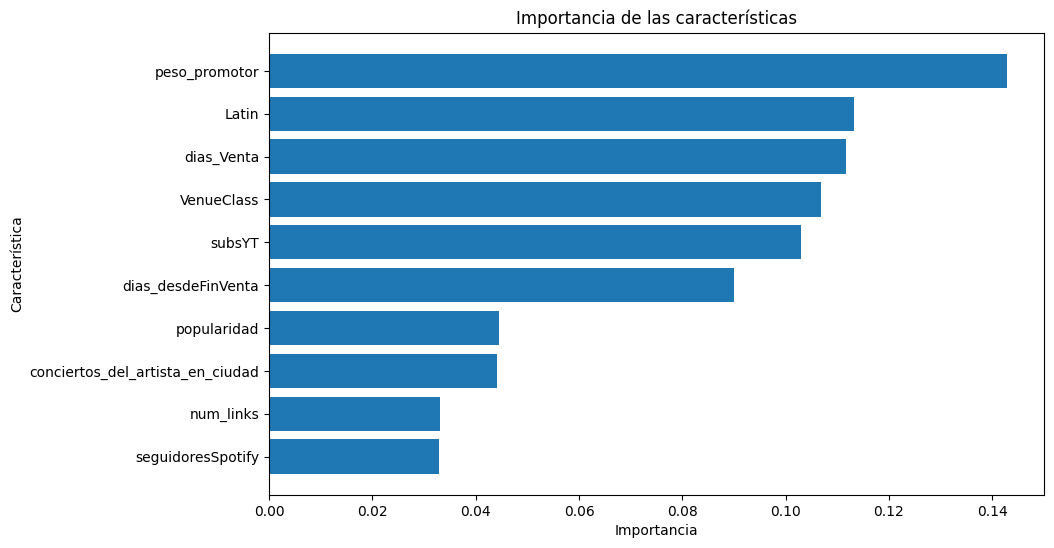

In [38]:
# Importancia de las características
feature_importance_random = modelo_rf_base.feature_importances_
top_indices_random = np.argsort(feature_importance_random)[::-1][:10]

print("\nCaracterísticas más importantes del modelo:")
for i in top_indices_random:
    print(f"{X_test.columns[i]}: {feature_importance_random[i]}")

# Crear un DataFrame para las importancias de las características
df_feature_importance = pd.DataFrame({
    'Característica': X_test.columns[top_indices_random],
    'Importancia': feature_importance_random[top_indices_random]
})

# Visualizar las características más importantes
plt.figure(figsize=(10, 6))
plt.barh(df_feature_importance['Característica'], df_feature_importance['Importancia'])
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title('Importancia de las características')
plt.gca().invert_yaxis()
plt.show()

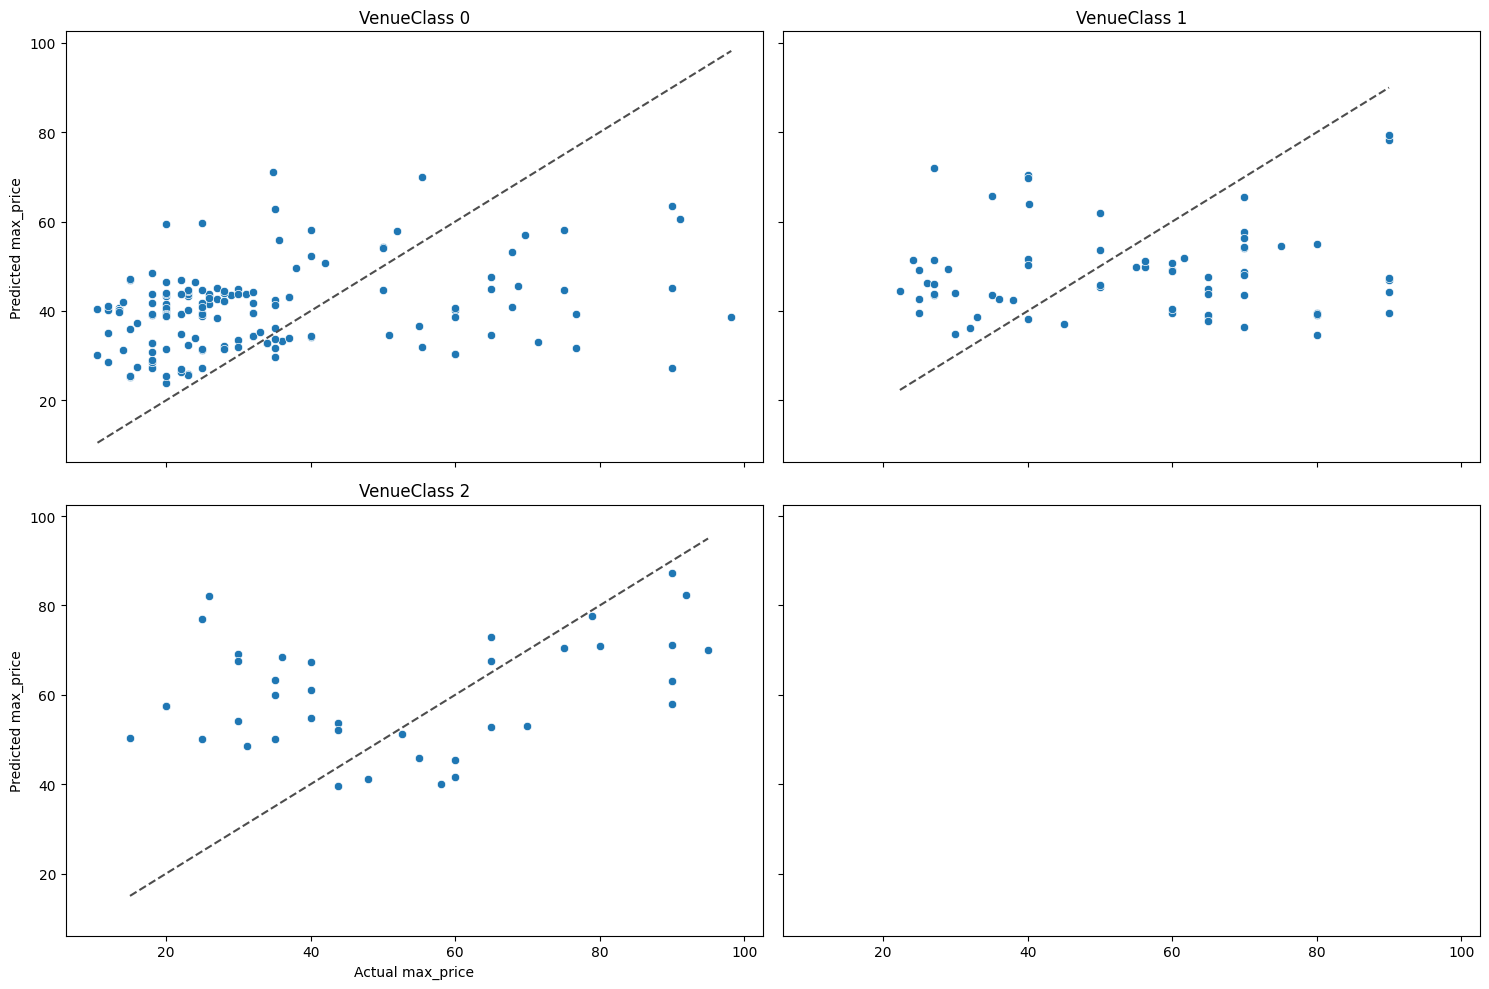

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Realizar predicciones con el modelo entrenado sobre X_test
predicciones = modelo_rf_base.predict(X_test)

# Crear DataFrame con valores reales y predichos
df_predicciones = pd.DataFrame({
    'max_price_real': y_test,  # Valores reales
    'max_price_pred': predicciones  # Valores predichos
})

# Agregar la columna VenueClass a df_predicciones si es necesario
# Suponiendo que VenueClass está en el DataFrame original 'datos' y es necesario
# df_predicciones['VenueClass'] = datos.loc[X_test.index, 'VenueClass']

# Crear gráficos de dispersión para comparar predicciones con valores reales por cada "VenueClass"
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharex=True, sharey=True)

# Asegurarnos de que los valores de 'VenueClass' están ordenados para una mejor visualización
venue_classes = sorted(data_test['VenueClass'].unique())

for idx, vc in enumerate(venue_classes):
    subset = df_predicciones.loc[X_test['VenueClass'] == vc]
    ax = axes[idx//2, idx%2]  # Ubicación del gráfico en la cuadrícula
    sns.scatterplot(ax=ax, x='max_price_real', y='max_price_pred', data=subset)
    ax.plot([subset['max_price_real'].min(), subset['max_price_real'].max()],
            [subset['max_price_real'].min(), subset['max_price_real'].max()],
            ls="--", c=".3")
    ax.set_title(f'VenueClass {vc}')
    ax.set_xlabel('Actual max_price')
    ax.set_ylabel('Predicted max_price')

plt.tight_layout()
plt.show()
